In [127]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go

# Define the API endpoint and parameters
url = "https://api.fda.gov/drug/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)

    # Convert DataFrame to CSV
    csv_file_path = 'data.csv'
    recall_df.to_csv(csv_file_path, index=False)
    
    print(f"Converted API data to {csv_file_path}")
else:
    print("Failed to retrieve data:", response.status_code)

Converted API data to data.csv


In [128]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [129]:
clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     
                                    
                                    })


clean_df.head()


,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Report Date,Code Info,Termination Date,more_code_info
0,Ongoing,San Juan Del Rio,N/A,Mexico,Class II,{},Drugs,86162,Albek De Mexico S.A. De C.V.,Oriente Cuatro No. 11 Nuevo,...,D-0080-2021,Assured Instant Hand Sanitizer Aloe & Moisturi...,"27,000 bottles",CGMP Deviations: Next Advanced Antibacterial H...,20200730,20201117,20201125,1931102AL,NaN,NaN
1,Terminated,Parsippany,NJ,United States,Class II,"{'application_number': ['ANDA040422'], 'brand_...",Drugs,85712,Teva Pharmaceuticals USA,400 Interpace Pkwy,...,D-1285-2020,"Dextroamphetamine Saccharate, Amphetamine Aspa...","33,280 bottles",Some bottles may contain mixed strengths of th...,20200522,20200604,20200610,"Lot #: 42614718, Exp. date 02/2021",20210525,NaN
2,Terminated,Allegan,MI,United States,Class II,"{'application_number': ['M012'], 'brand_name':...",Drugs,88905,Perrigo Company PLC,515 Eastern Ave,...,D-0623-2022,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","1,560 bottles",CGMP Deviations: Products were manufactured wi...,20211026,20220223,20220302,"Batch: 1BK0964, Exp 01/31/2023",20230929,
3,Ongoing,Dania Beach,FL,United States,Class II,"{'application_number': ['part348'], 'brand_nam...",Drugs,94788,Little Moon Essentials LLC,501 Old Griffin Rd,...,D-0572-2024,"Little Moon Essentials, Crampy Belly Rub (Camp...",788 glass jars,CGMP deviations,20240620,20240702,20240710,lot code No Expiration Date on product: a) 22...,NaN,NaN
4,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['NDA200796'], 'brand_n...",Drugs,87512,Cardinal Health Inc.,7000 Cardinal Pl,...,D-0429-2021,Edarbi (azilsartan medoxomil) tablets 80 mg 30...,328 bottles,CGMP Deviations: Intermittent exposure to temp...,20210315,20210524,20210602,78902-1,20240617,NaN


In [130]:
US_recalls_df = clean_df[
    (clean_df['Country'] == 'United States') &
    (clean_df['Status'] == 'Terminated')
     ]
US_recalls_df.head()

,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Report Date,Code Info,Termination Date,more_code_info
1,Terminated,Parsippany,NJ,United States,Class II,"{'application_number': ['ANDA040422'], 'brand_...",Drugs,85712,Teva Pharmaceuticals USA,400 Interpace Pkwy,...,D-1285-2020,"Dextroamphetamine Saccharate, Amphetamine Aspa...","33,280 bottles",Some bottles may contain mixed strengths of th...,20200522,20200604,20200610,"Lot #: 42614718, Exp. date 02/2021",20210525,NaN
2,Terminated,Allegan,MI,United States,Class II,"{'application_number': ['M012'], 'brand_name':...",Drugs,88905,Perrigo Company PLC,515 Eastern Ave,...,D-0623-2022,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","1,560 bottles",CGMP Deviations: Products were manufactured wi...,20211026,20220223,20220302,"Batch: 1BK0964, Exp 01/31/2023",20230929,
4,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['NDA200796'], 'brand_n...",Drugs,87512,Cardinal Health Inc.,7000 Cardinal Pl,...,D-0429-2021,Edarbi (azilsartan medoxomil) tablets 80 mg 30...,328 bottles,CGMP Deviations: Intermittent exposure to temp...,20210315,20210524,20210602,78902-1,20240617,NaN
5,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['ANDA077857'], 'brand_...",Drugs,89450,CARDINAL HEALTHCARE,7200 Cardinal Pl W,...,D-0179-2024,"Enoxaparin Sodium Injection, USP, 150MG/ML Sin...",2 units,CGMP Deviations: Products were exposed to temp...,20220126,20231226,20240103,Batch SAH06821A,20240929,
8,Terminated,Brookhaven,NY,United States,Class II,{},Drugs,85386,"Amneal Pharmaceuticals of New York, LLC",50 Horseblock Rd,...,D-1253-2020,"Nizatidine Oral Solution, 15 mg/mL (75 mg/5mL)...",11258 bottles,CGMP Deviations: potential N-Nitrosodimethylam...,20200415,20200424,20200506,06598004A 04/2020 06599001A 12/2020 06599002...,20210908,NaN


In [131]:
recalling_firm_df = US_recalls_df["Recalling Firm"].unique()
recalling_firm_count_df = len(recalling_firm_df)
print("Total amount of unique Recalling Firms associated to the FDA Recalls is "  + str(recalling_firm_count_df) )

Total amount of unique Recalling Firms associated to the FDA Recalls is 132


In [132]:
firm_count_df = US_recalls_df["Recalling Firm"].value_counts().head(10)

print(firm_count_df)

Recalling Firm
Cardinal Health Inc.                                       18
Vita Pharmacy, LLC dba Talon Compounding Pharmacy          18
Mckesson Medical-Surgical Inc. Corporate Office            16
Herbal Doctor Remedies                                     10
Teva Pharmaceuticals USA                                    8
Teligent Pharma, Inc.                                       7
Fusion IV Pharmaceuticals, Inc. dba Axia Pharmaceutical     7
Pharmacy Innovations                                        7
Assurance Infusion                                          6
Perrigo Company PLC                                         6
Name: count, dtype: int64


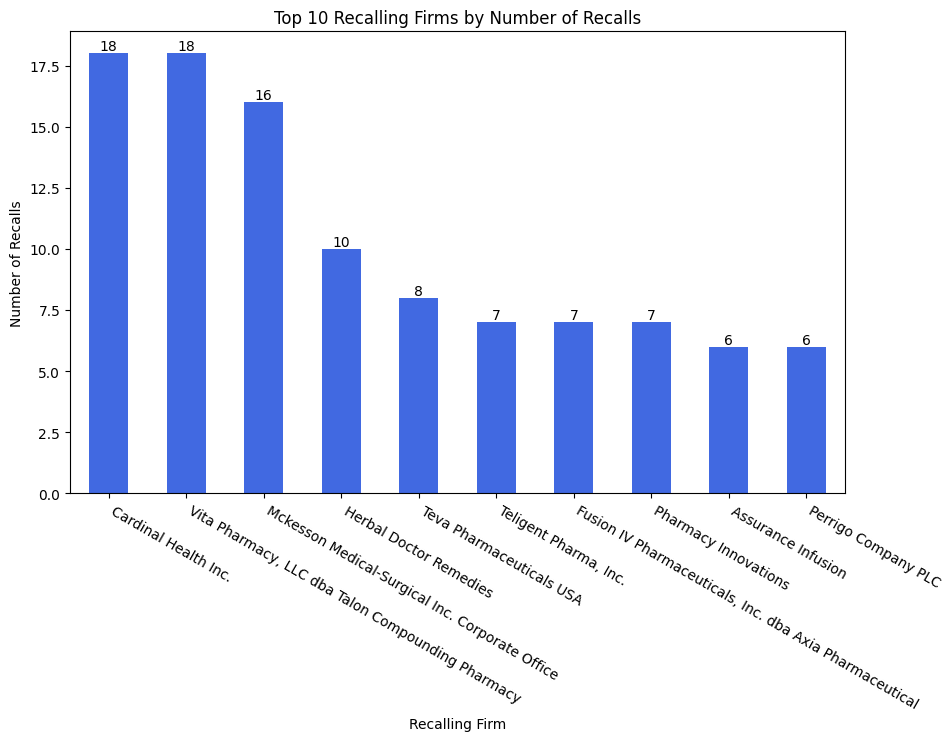

In [133]:
# Ensure the directory exists
output_dir = "data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your plotting code
ax = firm_count_df.plot(kind="bar", 
                   color="royalblue",
                   figsize=(10, 6), 
                   title="Top 10 Recalling Firms by Number of Recalls")
plt.xlabel("Recalling Firm")
plt.ylabel("Number of Recalls")
plt.xticks(rotation=-30, ha="left")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        # Determine the label position: top or bottom of the bar
        y_offset = height if height > 0 else height
        va = "bottom" if height > 0 else "top"
        
        # Add a text label
        ax.text(bar.get_x() + bar.get_width() / 2, y_offset, 
                f'{height}', 
                ha="center", va=va)

# Save the figure
plt.savefig(os.path.join(output_dir, "Top 10 Recalling Firms by Number of Recalls.png"))
plt.show()


In [134]:
# Get the top 15 recalling firms
top_firms = clean_df["Recalling Firm"].value_counts().head(10).index

# Filter the dataset to include only the top 15 firms
filtered_df = clean_df[clean_df["Recalling Firm"].isin(top_firms)]

# Group the data by firm and status
grouped_data = filtered_df.groupby(["Recalling Firm", 'Classification']).size().unstack(fill_value=0)

# Create a single subplot
fig = go.Figure()

# Stacked bar plot for status breakdown
for status in grouped_data.columns:
    fig.add_trace(
        go.Bar(x=grouped_data.index, y=grouped_data[status], name=status)
    )

# Update layout for a better presentation
fig.update_layout(
    barmode="stack",
    height=700,
    width=1000,
    title_text="Classification Breakdown by Top 10 Recalling Firms",
    showlegend=True
)

fig.update_xaxes(title_text="Recalling Firm")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'name': 'Class I',
              'type': 'bar',
              'x': array(['Akorn, Inc.', 'Cardinal Health Inc.',
                          'Central Admixture Pharmacy Services Inc',
                          'Central Admixture Pharmacy Services, Inc.',
                          'Family Dollar Stores, Llc.', 'Herbal Doctor Remedies',
                          'Mckesson Medical-Surgical Inc. Corporate Office',
                          'Preferred Pharmaceuticals, Inc.', 'Sentara Infusion Services',
                          'Vita Pharmacy, LLC dba Talon Compounding Pharmacy'], dtype=object),
              'y': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])},
             {'name': 'Class II',
              'type': 'bar',
              'x': array(['Akorn, Inc.', 'Cardinal Health Inc.',
                          'Central Admixture Pharmacy Services Inc',
                          'Central Admixture Pharmacy Services, Inc.',
                          'Family Dollar Stores, Llc.', 'Herbal Doctor Remedies',
                          'Mckesson Medical-Surgical Inc. Corporate Office',
                          'Preferred Pharmaceuticals, Inc.', 'Sentara Infusion Services',
                          'Vita Pharmacy, LLC dba Talon Compounding Pharmacy'], dtype=object),
              'y': array([17, 18, 11, 19, 12, 10, 16, 10,  8, 18])},
             {'name': 'Class III',
              'type': 'bar',
              'x': array(['Akorn, Inc.', 'Cardinal Health Inc.',
                          'Central Admixture Pharmacy Services Inc',
                          'Central Admixture Pharmacy Services, Inc.',
                          'Family Dollar Stores, Llc.', 'Herbal Doctor Remedies',
                          'Mckesson Medical-Surgical Inc. Corporate Office',
                          'Preferred Pharmaceuticals, Inc.', 'Sentara Infusion Services',
                          'Vita Pharmacy, LLC dba Talon Compounding Pharmacy'], dtype=object),
              'y': array([2, 1, 0, 0, 0, 0, 0, 0, 0, 0])}],
    'layout': {'barmode': 'stack',
               'height': 700,
               'showlegend': True,
               'template': '...',
               'title': {'text': 'Classification Breakdown by Top 10 Recalling Firms'},
               'width': 1000,
               'xaxis': {'title': {'text': 'Recalling Firm'}}}
})

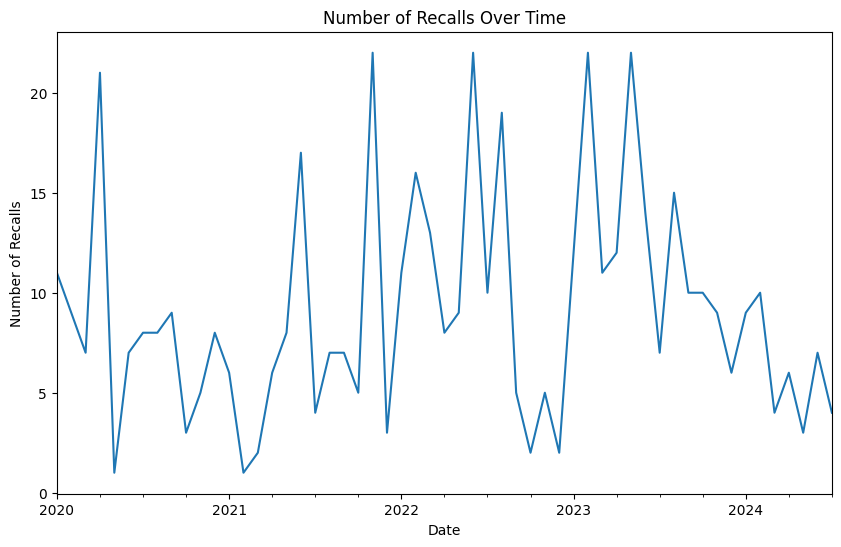

In [135]:
# Load the dataset
df = pd.read_csv('data.csv')

# Convert report_date to datetime format
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d')

# Group by year and month, then count the number of recalls
recall_trends = df.groupby(df['report_date'].dt.to_period('M')).size()

# Plot the recall trends over time
recall_trends.plot(kind='line', figsize=(10, 6), title='Number of Recalls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recalls')
plt.show()

In [136]:
# Group by year and classification, then count the number of recalls
recall_trends_yearly = df.groupby([df['report_date'].dt.year, 'classification']).size().unstack(fill_value=0)
recall_trends_yearly

classification,Class I,Class II,Class III
report_date,,,
2020,9,81,7
2021,13,64,11
2022,11,97,14
2023,6,135,9
2024,9,28,6


<Figure size 1200x600 with 0 Axes>

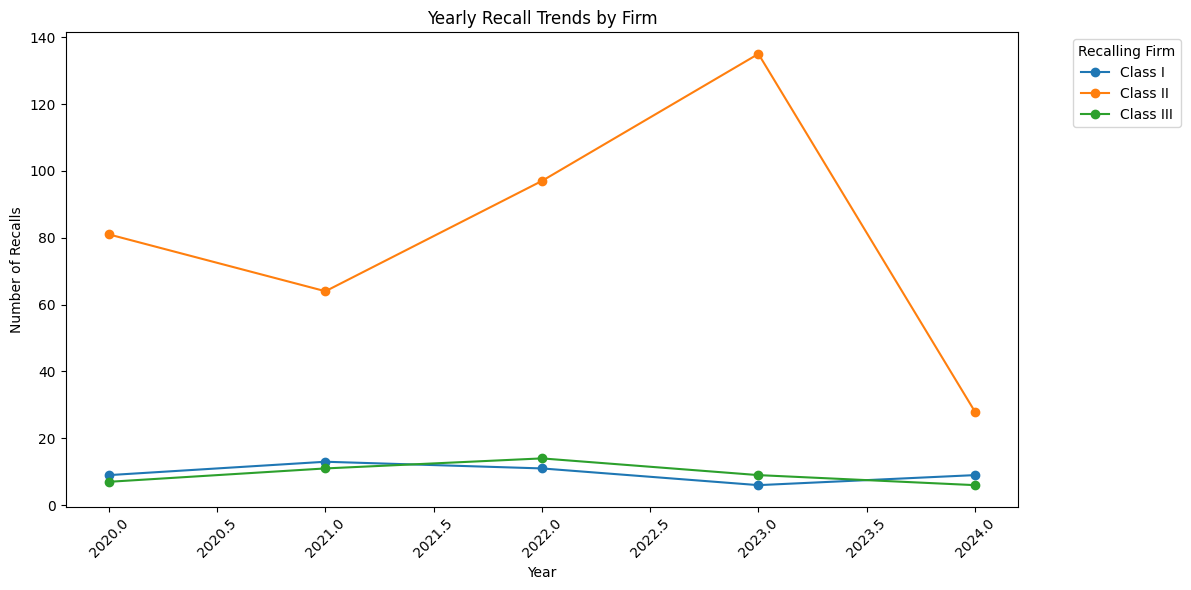

In [137]:
# Group by year and classification, then count the number of recalls
plt.figure(figsize=(12, 6))
recall_trends_yearly.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Yearly Recall Trends by Firm")
plt.xlabel("Year")
plt.ylabel("Number of Recalls")
plt.xticks(rotation=45)
plt.legend(title="Recalling Firm", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [138]:
#states impacted by Recalls?
US_recalls_df = US_recalls_df[US_recalls_df['State'].str.strip() != '']
states_impacted = US_recalls_df['State'].unique()
states_impactedcount = len(states_impacted)
time_period = US_recalls_df['Report Date'].unique()

time_period_dates = pd.to_datetime(time_period)

# Sort dates
time_period_dates = time_period_dates.sort_values()

earliest_date = time_period_dates[0]
latest_date = time_period_dates[-1]

# Print the earliest and latest dates 
print(f"Earliest Date: {earliest_date.strftime('%B %Y')}")
print(f"Latest Date: {latest_date.strftime('%B %Y')}")


print(states_impacted)
print(str(states_impactedcount) + ' States Impacted by FDA Recalls' + ' '+'between ' + earliest_date.strftime('%B %Y') + ' to ' + latest_date.strftime('%B %Y'))


Earliest Date: January 2020
Latest Date: April 2024
['NJ' 'MI' 'OH' 'NY' 'GA' 'CT' 'CA' 'TX' 'TN' 'FL' 'PA' 'MA' 'NM' 'VA'
 'WV' 'AR' 'OR' 'CO' 'AZ' 'NC' 'MN' 'UT' 'LA' 'IA' 'MO' 'IL' 'VT' 'PR'
 'MD' 'KY' 'SC' 'WA' 'DE']
33 States Impacted by FDA Recalls between January 2020 to April 2024


In [139]:
state_counts = US_recalls_df['State'].value_counts().head(10)
print(state_counts)


State
NJ    54
TX    34
CA    31
OH    28
NY    23
VA    21
FL    14
CT    11
PA    11
NC    10
Name: count, dtype: int64


In [140]:
Impacted_states = state_counts.head(10).index.tolist()
print(Impacted_states)

['NJ', 'TX', 'CA', 'OH', 'NY', 'VA', 'FL', 'CT', 'PA', 'NC']


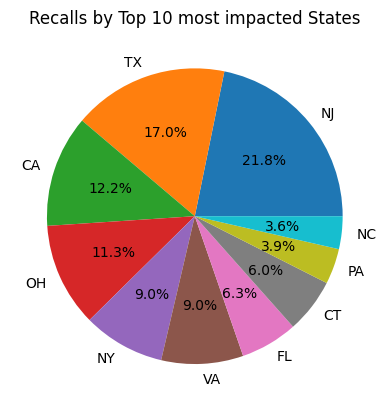

In [141]:
# Get the top 5 most impacted states
top_states = Impacted_states[:10]

# Get the count of recalls for each state
state_counts = clean_df['State'].value_counts()

# Filter the state counts for the top 5 states
top_state_counts = state_counts[state_counts.index.isin(top_states)]

# Plot 
plt.pie(top_state_counts, labels=top_states, autopct='%1.1f%%')
plt.title('Recalls by Top 10 most impacted States')
plt.show()

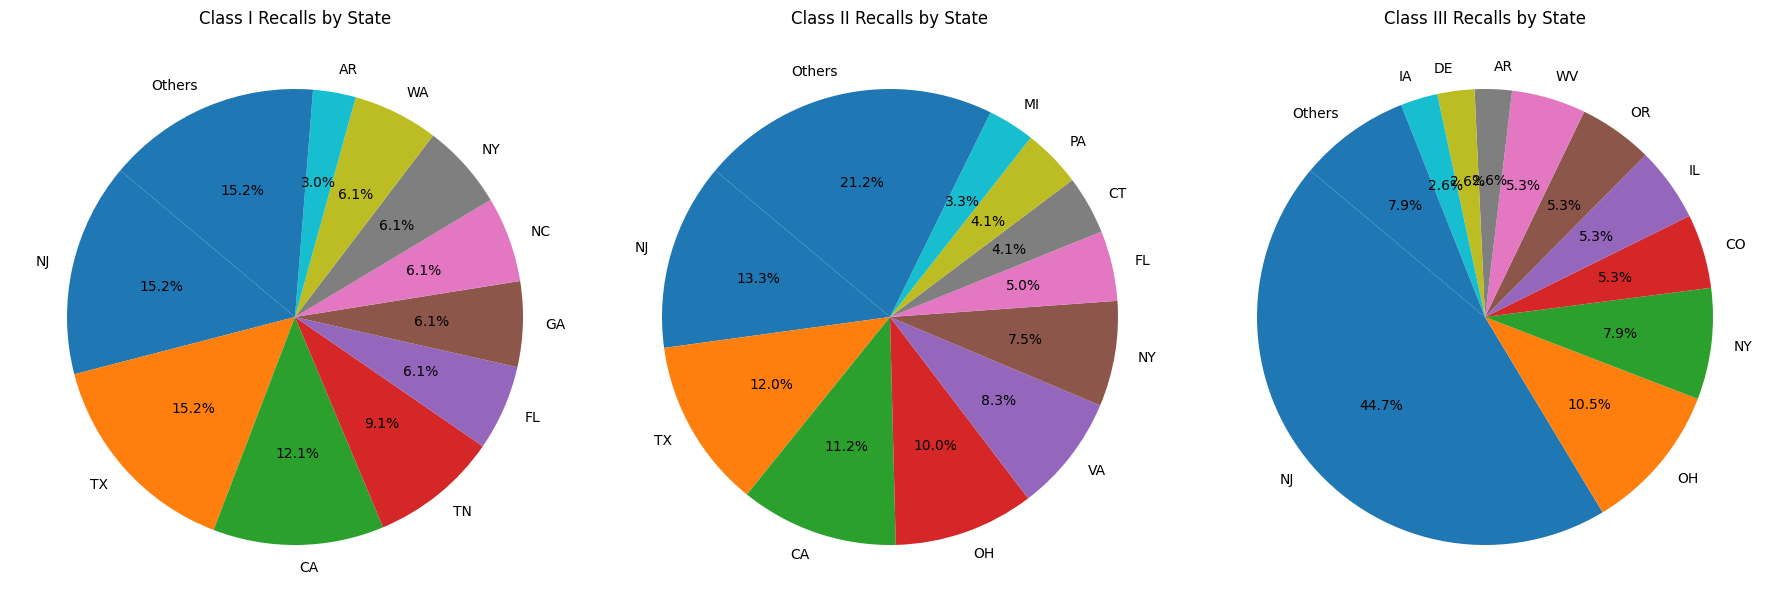

In [142]:
# Group by Classification and State, and count the occurrences
classification_state_counts = US_recalls_df.groupby(['Classification', 'State']).size().unstack(fill_value=0)
    
    # Function to prepare data for pie chart with top 10 states and "Others"
def prepare_pie_data(data):
        top_10 = data.nlargest(10)
        others = pd.Series(data.sum() - top_10.sum(), index=['Others'])
        return pd.concat([top_10, others])
    
    # Plot pie charts for each classification
classifications = ['Class I', 'Class II', 'Class III']
    
plt.figure(figsize=(18, 6))  # Adjust the size to fit three pie charts
    
for i, classification in enumerate(classifications):
        plt.subplot(1, 3, i + 1)
        if classification in classification_state_counts.index:
            pie_data = prepare_pie_data(classification_state_counts.loc[classification])
            pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
            plt.title(f'{classification} Recalls by State')
            plt.ylabel('')  # Remove the y-label to clean up the plot
    
plt.tight_layout()
plt.show()

In [143]:
# Count recalls by classification and year
# Extract year from report_date
US_recalls_df['Report Year'] = pd.to_datetime(US_recalls_df['Report Date']).dt.year
    
    # Group by Classification and Report Year, and count the occurrences
classification_year_counts = US_recalls_df.groupby(['Classification', 'Report Year']).size().unstack(fill_value=0)
    
    # Display the counts in the console
print("Recall counts by Classification and Year:")
print(classification_year_counts)
  

Recall counts by Classification and Year:
Report Year     2020  2021  2022  2023  2024
Classification                              
Class I            9    11    11     2     0
Class II          70    57    62    42    10
Class III          6    11    14     7     0


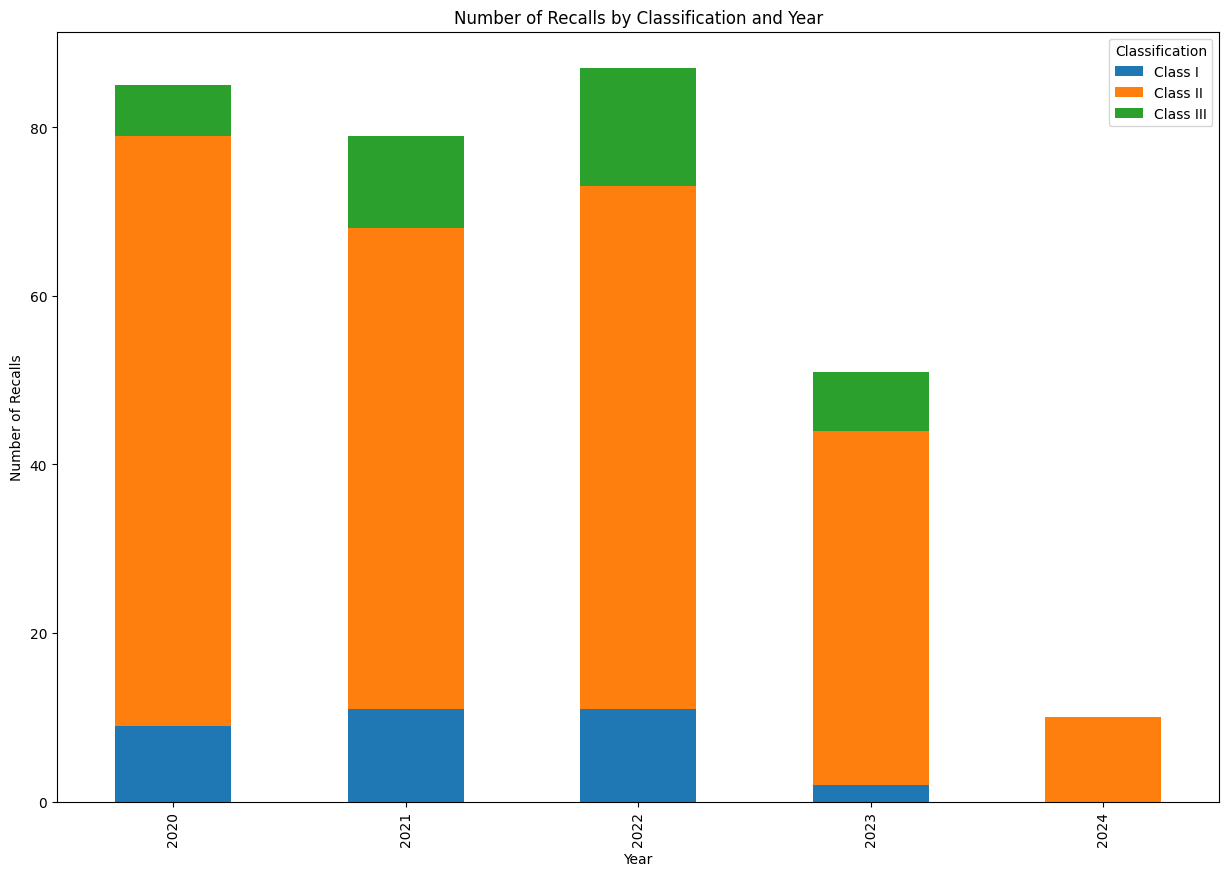

In [144]:
  
    # Plot classification and year relationship
classification_year_counts.T.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Number of Recalls by Classification and Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.legend(title='Classification')
plt.show()

In [145]:
#Clean DataFrame to only USA
US_recalls_df = clean_df[
    (clean_df['Country'] == 'United States') &
    (clean_df['Status'] == 'Terminated')
     ]
US_recalls_df.head()


,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Report Date,Code Info,Termination Date,more_code_info
1,Terminated,Parsippany,NJ,United States,Class II,"{'application_number': ['ANDA040422'], 'brand_...",Drugs,85712,Teva Pharmaceuticals USA,400 Interpace Pkwy,...,D-1285-2020,"Dextroamphetamine Saccharate, Amphetamine Aspa...","33,280 bottles",Some bottles may contain mixed strengths of th...,20200522,20200604,20200610,"Lot #: 42614718, Exp. date 02/2021",20210525,NaN
2,Terminated,Allegan,MI,United States,Class II,"{'application_number': ['M012'], 'brand_name':...",Drugs,88905,Perrigo Company PLC,515 Eastern Ave,...,D-0623-2022,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","1,560 bottles",CGMP Deviations: Products were manufactured wi...,20211026,20220223,20220302,"Batch: 1BK0964, Exp 01/31/2023",20230929,
4,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['NDA200796'], 'brand_n...",Drugs,87512,Cardinal Health Inc.,7000 Cardinal Pl,...,D-0429-2021,Edarbi (azilsartan medoxomil) tablets 80 mg 30...,328 bottles,CGMP Deviations: Intermittent exposure to temp...,20210315,20210524,20210602,78902-1,20240617,NaN
5,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['ANDA077857'], 'brand_...",Drugs,89450,CARDINAL HEALTHCARE,7200 Cardinal Pl W,...,D-0179-2024,"Enoxaparin Sodium Injection, USP, 150MG/ML Sin...",2 units,CGMP Deviations: Products were exposed to temp...,20220126,20231226,20240103,Batch SAH06821A,20240929,
8,Terminated,Brookhaven,NY,United States,Class II,{},Drugs,85386,"Amneal Pharmaceuticals of New York, LLC",50 Horseblock Rd,...,D-1253-2020,"Nizatidine Oral Solution, 15 mg/mL (75 mg/5mL)...",11258 bottles,CGMP Deviations: potential N-Nitrosodimethylam...,20200415,20200424,20200506,06598004A 04/2020 06599001A 12/2020 06599002...,20210908,NaN


In [169]:
#Which types of medications are recalled most frequently? Need to group them by product description


recall_product = US_recalls_df.groupby([US_recalls_df['Product Description'], 'Reason for Recall']).size()##.unstack(fill_value=0)
print(recall_product)





Product Description                                                                                                                                                                                                                                                              Reason for Recall                                                                                                                                                                                        
0.9% SODIUM CHLORIDE Irrigation, USP 1000 mL Semi-Rigid Bottle, Rx only, Manufactured for ICU Medical, Inc., Lake Forest, Illinois, 60045 USA. NDC 0990-7138-09                                                                                                                  Presence of particulate matter.one confirmed  customer report of particulate matter within two semi-rigid bottles identified prior to use                                                                    1
365 SKINNY High Intensity Capsules, 600 mg,  

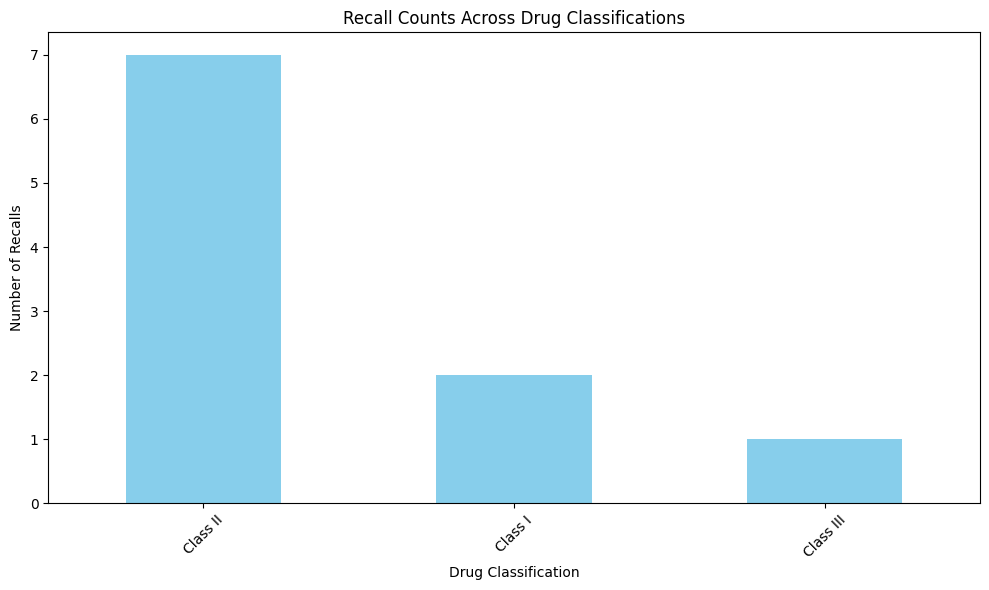

In [186]:

#Create a bar chart recalling counts across different drugs categories like classifications 1,2,3 
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Product Description': [
        '0.9% SODIUM CHLORIDE Irrigation, USP 1000 mL', 
        '365 SKINNY High Intensity Capsules, 600 mg', 
        '8.4% Sodium Bicarbonate Injection, USP', 
        'ALPROSTADIL 22MCG/ML INJECTABLE',
        'ALPROSTADIL 40MCG/ML INJ',
        'kleantouch HAND SANITIZER (ethyl alcohol 70%)',
        'labetalol HCl 20 mg/4mL Injection',
        'medroxyprogesterone acetate injectable suspension, USP',
        'quinapril and hydrochlorothiazide tablets',
        'xigduo XR (dapgliflozin/metformin HCl extended-release) tablets'
    ],
    'Reason for Recall': [
        'Presence of particulate matter',
        'Marketed Without an Approved NDA/ANDA',
        'Lack of Assurance of Sterility',
        'Lack of assurance of sterility',
        'Lack of assurance of sterility',
        'Marketed Without an Approved NDA/ANDA',
        'Lack of Assurance of Sterility',
        'CGMP Deviations: Intermittent exposure to temperature excursion',
        'CGMP Deviations: N-nitroso impurity above acceptable limit',
        'CGMP Deviations: Intermittent exposure to temperature excursion'
    ],
    'Classification': [
        'Class II', 'Class I', 'Class II', 'Class II', 
        'Class II', 'Class I', 'Class II', 'Class II', 
        'Class II', 'Class III'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

#Group by Classification and count occurrences
classification_counts = df['Classification'].value_counts()

#Plot the bar chart
plt.figure(figsize=(10, 6))
classification_counts.plot(kind='bar', color='skyblue')

#Customize the chart
plt.title('Recall Counts Across Drug Classifications')
plt.xlabel('Drug Classification')
plt.ylabel('Number of Recalls')
plt.xticks(rotation=45)

#Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()




In [192]:
US_recalls_df = clean_df[
    (clean_df['Country'] == 'United States') &
    (clean_df['Status'] == 'Terminated')
     ]
US_recalls_df.iloc[0:500]


,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Report Date,Code Info,Termination Date,more_code_info
1,Terminated,Parsippany,NJ,United States,Class II,"{'application_number': ['ANDA040422'], 'brand_...",Drugs,85712,Teva Pharmaceuticals USA,400 Interpace Pkwy,...,D-1285-2020,"Dextroamphetamine Saccharate, Amphetamine Aspa...","33,280 bottles",Some bottles may contain mixed strengths of th...,20200522,20200604,20200610,"Lot #: 42614718, Exp. date 02/2021",20210525,NaN
2,Terminated,Allegan,MI,United States,Class II,"{'application_number': ['M012'], 'brand_name':...",Drugs,88905,Perrigo Company PLC,515 Eastern Ave,...,D-0623-2022,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","1,560 bottles",CGMP Deviations: Products were manufactured wi...,20211026,20220223,20220302,"Batch: 1BK0964, Exp 01/31/2023",20230929,
4,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['NDA200796'], 'brand_n...",Drugs,87512,Cardinal Health Inc.,7000 Cardinal Pl,...,D-0429-2021,Edarbi (azilsartan medoxomil) tablets 80 mg 30...,328 bottles,CGMP Deviations: Intermittent exposure to temp...,20210315,20210524,20210602,78902-1,20240617,NaN
5,Terminated,Dublin,OH,United States,Class II,"{'application_number': ['ANDA077857'], 'brand_...",Drugs,89450,CARDINAL HEALTHCARE,7200 Cardinal Pl W,...,D-0179-2024,"Enoxaparin Sodium Injection, USP, 150MG/ML Sin...",2 units,CGMP Deviations: Products were exposed to temp...,20220126,20231226,20240103,Batch SAH06821A,20240929,
8,Terminated,Brookhaven,NY,United States,Class II,{},Drugs,85386,"Amneal Pharmaceuticals of New York, LLC",50 Horseblock Rd,...,D-1253-2020,"Nizatidine Oral Solution, 15 mg/mL (75 mg/5mL)...",11258 bottles,CGMP Deviations: potential N-Nitrosodimethylam...,20200415,20200424,20200506,06598004A 04/2020 06599001A 12/2020 06599002...,20210908,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Terminated,Woodbine,IA,United States,Class II,{},Drugs,90297,"Grato Holdings, Inc.",201 Apple Blvd,...,D-0990-2022,"Homeopathic EarAche Ear Drops, 0.33 FL OZ (10 ...","50,640 bottles",Microbial contamination of non-sterile product.,20220524,20220608,20220615,"Lot #: G11639, Exp. Date 09/24",20230608,
494,Terminated,East Haven,CT,United States,Class II,{},Drugs,86579,"Milbar Laboratories, Inc.",20 Commerce St,...,D-0084-2021,DCL B Prox10 Anti-Blemish Wash (Benzoyl Peroxi...,"7,591 bottles",GMP Deviations,20201009,20201117,20201125,"Lot # MV098-4, Exp. Date Dec-21 Lot #: JW995,...",20230104,NaN
495,Terminated,Seattle,WA,United States,Class I,{},Drugs,90627,"Amazon.com, Inc.",2021 7th Ave,...,D-1296-2022,"Ortiga mas Ajo Rey Reforzado con Omega 3, 6 y ...","35,622 cartons",Marketed Without An Approved NDA/ANDA: FDA lab...,20220526,20220727,20220727,"Lot #: 040 19, Exp. 09 FEB 2025",20221108,NaN
497,Terminated,Monterey Park,CA,United States,Class II,{},Drugs,85341,Herbal Doctor Remedies,497 Cumbre St,...,D-1141-2020,"Lump Shrinker, 500mg Capsules, 90-count bottle...",N/A,CGMP Deviations: These products have been foun...,20200324,20200407,20200415,All lots within expiry,20240125,NaN


In [200]:

#What are the most common reasons for recalls? group them


# Get the counts of each reason for recall
most_common_reasons = US_recalls_df['Reason for Recall'].value_counts()

# Display the top reasons
print(most_common_reasons.head(15))  # Show the top 5 most common reasons



Reason for Recall
Lack of Assurance of Sterility                                                                                32
Lack of assurance of sterility                                                                                18
CGMP Deviations: Intermittent exposure to temperature excursion during storage.                               17
cGMP deviations: Temperature abuse                                                                            12
Lack of Assurance of Sterility: FDA inspection revealed insanitary conditions at the facility.                 7
CGMP Deviations: These products have been found to be misbranded as unapproved new drugs                       7
Lack of sterility assurance.                                                                                   7
Lack of Processing Control                                                                                     6
cGMP Deviations                                                               

In [212]:

# Sample data
data = {
    'Reason for Recall': [
        'Lack of Assurance of Sterility',
        'Lack of assurance of sterility',
        'CGMP Deviations: Intermittent exposure to temperature excursion during storage.',
        'cGMP deviations: Temperature abuse',
        'Lack of Assurance of Sterility: FDA inspection revealed insanitary conditions at the facility.',
        'CGMP Deviations: These products have been found to be misbranded as unapproved new drugs',
        'Lack of sterility assurance.',
        'Lack of Processing Control',
        'cGMP Deviations',
        'CGMP Deviations',
        'CGMP Deviations: recalling drug products following an FDA inspection.',
        'cGMP deviations',
        'CGMP Deviations: Products were exposed to temperatures outside of the products labeled storage conditions.',
        'Subpotent Drug',
        'Failed Dissolution Specifications'
    ],
    'Count': [32, 18, 17, 12, 7, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4]
}

df = pd.DataFrame(data)

# Standardize text
df['Reason for Recall'] = df['Reason for Recall'].str.lower().str.replace('lack of assurance of sterility', 'sterility assurance issues', regex=False)
df['Reason for Recall'] = df['Reason for Recall'].str.replace('cgmp deviations', 'cgmp deviations', regex=False)

# Group and sum counts
grouped = df.groupby('Reason for Recall')['Count'].sum().reset_index()

print(grouped)



                                    Reason for Recall  Count
0                                     cgmp deviations     16
1   cgmp deviations: intermittent exposure to temp...     17
2   cgmp deviations: products were exposed to temp...      4
3   cgmp deviations: recalling drug products follo...      5
4                  cgmp deviations: temperature abuse     12
5   cgmp deviations: these products have been foun...      7
6                   failed dissolution specifications      4
7                          lack of processing control      6
8                        lack of sterility assurance.      7
9                          sterility assurance issues     50
10  sterility assurance issues: fda inspection rev...      7
11                                     subpotent drug      4


In [214]:
import pandas as pd

# Sample data
data = {
    'Reason for Recall': [
        'cgmp deviations',
        'cgmp deviations: intermittent exposure to temperature excursion during storage.',
        'cgmp deviations: products were exposed to temperatures outside of the products labeled storage conditions.',
        'cgmp deviations: recalling drug products following an FDA inspection.',
        'cgmp deviations: temperature abuse',
        'cgmp deviations: these products have been found to be misbranded as unapproved new drugs',
        'failed dissolution specifications',
        'lack of processing control',
        'lack of sterility assurance.',
        'sterility assurance issues',
        'sterility assurance issues: fda inspection revealed insanitary conditions at the facility.',
        'subpotent drug'
    ],
    'Count': [16, 17, 4, 5, 12, 7, 4, 6, 7, 50, 7, 4]
}

df = pd.DataFrame(data)

# Standardize CGMP Deviations
df['Reason for Recall'] = df['Reason for Recall'].str.replace(r'cgmp deviations.*', 'CGMP Deviations', regex=True)

# Group by the standardized reason and sum counts
grouped = df.groupby('Reason for Recall')['Count'].sum().reset_index()

# Sort the results for better readability
grouped = grouped.sort_values(by='Count', ascending=False)

print(grouped)



                                   Reason for Recall  Count
0                                    CGMP Deviations     61
4                         sterility assurance issues     50
3                       lack of sterility assurance.      7
5  sterility assurance issues: fda inspection rev...      7
2                         lack of processing control      6
1                  failed dissolution specifications      4
6                                     subpotent drug      4


In [215]:
import pandas as pd

# Sample data
data = {
    'Reason for Recall': [
        'CGMP Deviations',
        'sterility assurance issues',
        'lack of sterility assurance.',
        'sterility assurance issues: fda inspection revealed insanitary conditions at the facility.',
        'lack of processing control',
        'failed dissolution specifications',
        'subpotent drug'
    ],
    'Count': [61, 50, 7, 7, 6, 4, 4]
}

df = pd.DataFrame(data)

# Standardize Sterility Assurance Titles
df['Reason for Recall'] = df['Reason for Recall'].str.replace(
    r'sterility assurance issues.*|lack of sterility assurance.', 
    'Sterility Assurance Issues', 
    regex=True
)

# Group by the standardized reason and sum counts
grouped = df.groupby('Reason for Recall')['Count'].sum().reset_index()

# Sort the results for better readability
grouped = grouped.sort_values(by='Count', ascending=False)

print(grouped)


                   Reason for Recall  Count
1         Sterility Assurance Issues     64
0                    CGMP Deviations     61
3         lack of processing control      6
2  failed dissolution specifications      4
4                     subpotent drug      4


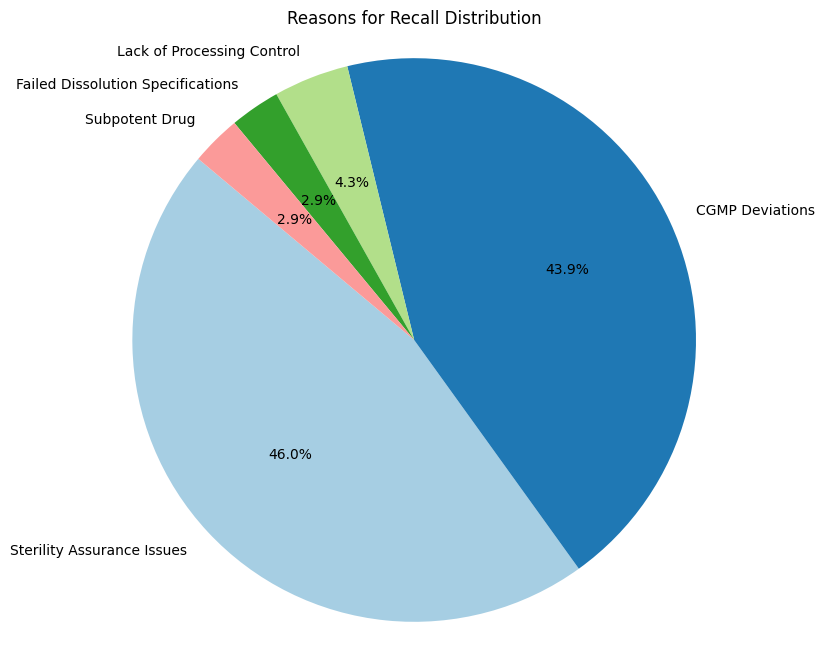

In [216]:
#Create a pie chart showing the distribution of reason for recalls. ex. contamination, mislabeling, adverse side effect


data = {
    'Reason for Recall': [
        'Sterility Assurance Issues',
        'CGMP Deviations',
        'Lack of Processing Control',
        'Failed Dissolution Specifications',
        'Subpotent Drug'
    ],
    'Count': [64, 61, 6, 4, 4]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['Reason for Recall'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Reasons for Recall Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

